In [1]:
## Data Exploration Project
# Goals:
# - to explore a dataset and draw meaningful insights
# - to practice Python DS libraries (pandas, matplotlib, numpy etc)
# - to experiment with interactive visualization

In [2]:
# dataset: City of New York, Department of Consumer Affairs - License Applications
# For more information on the dataset: https://data.cityofnewyork.us/Business/License-Applications/ptev-4hud
api_endpoint = 'https://data.cityofnewyork.us/resource/aiza-48ch.json'

In [3]:
# use requests library to get data via API
import requests
data = requests.get(api_endpoint).json()

In [4]:
# load the data into a dataframe
import pandas as pd
data = pd.DataFrame(data)

In [5]:
data.head()

,application_category,application_id,application_or_renewal,building_number,business_name,city,contact_phone,description,end_date,latitude,...,start_date,state,status,street,street_2,temp_op_letter_expiration,temp_op_letter_issued,unit,unit_type,zip
0,Special,28615-2016-AHIS,Application,1202,THOMAS MELFI,BRONXVILLE,9149128891,NaN,2016-12-22T00:00:00.000,NaN,...,2016-12-21T00:00:00.000,NY,Issued,MIDLAND AVE,NaN,NaN,NaN,NaN,NaN,10708
1,Special,895-2019-RHIS,Renewal,16118,JANUSZ NATKANIEC,HOWARD BEACH,7183591819,NaN,2019-01-09T00:00:00.000,NaN,...,2019-01-08T00:00:00.000,NY,Issued,97TH ST,NaN,NaN,NaN,NaN,NaN,11414
2,Special,31837-2016-RHIC,Renewal,8751,SPRINGFIELD CONSTRUCTION CORP,JAMAICA,9172269662,NaN,2016-12-21T00:00:00.000,40.7057125,...,2016-12-20T00:00:00.000,NY,Issued,143RD ST,NaN,NaN,NaN,NaN,NaN,11435
3,Basic,29744-2016-RELE,Renewal,2530,SPRINT SPECTRUM L.P.,STATEN ISLAND,NaN,NaN,2016-12-16T00:00:00.000,NaN,...,2016-12-12T00:00:00.000,NY,Issued,HYLAN BLVD,NaN,NaN,NaN,NaN,NaN,10306
4,Special,11791-2018-RNWS,Renewal,S/E/C,"SHAH, PRASHANT S",QUEENS,917-575-0831,NaN,2018-08-29T00:00:00.000,40.7214535,...,2018-08-26T00:00:00.000,NY,Issued,71 AVENUE,QUEENS BOULEVARD,NaN,NaN,NaN,NaN,11375


In [6]:
rows, columns = data.shape
dimensions = data.ndim
print('rows:', rows, ' columns: ', columns, ' dimensions: ', dimensions)

rows: 1000  columns:  24  dimensions:  2


In [7]:
data.describe()

,application_category,application_id,application_or_renewal,building_number,business_name,city,contact_phone,description,end_date,latitude,...,start_date,state,status,street,street_2,temp_op_letter_expiration,temp_op_letter_issued,unit,unit_type,zip
count,1000,1000,1000,968,1000,995,887,6,994,453,...,1000,992,1000,966,10,1,1,250,124,994
unique,2,1000,2,777,971,220,843,6,144,447,...,223,25,4,722,10,1,1,155,10,337
top,Special,1100-2017-RHIC,Renewal,5,GENERAL WIRELESS OPERATIONS INC.,BROOKLYN,8174150932,STE B,2016-12-20T00:00:00.000,40.6957604,...,2016-12-19T00:00:00.000,NY,Issued,BROADWAY,C/O JOE SAVINO,7/6/2018,2017-12-13,2,STE,11385
freq,607,1,753,6,16,220,16,1,76,2,...,58,913,958,14,1,1,1,24,49,19


In [8]:
data['status'].describe()

count       1000
unique         4
top       Issued
freq         958
Name: status, dtype: object

In [9]:
# I'm interested in only Renewal applications
renewal_data = data[data.application_or_renewal == 'Renewal']
renewal_data.head()

,application_category,application_id,application_or_renewal,building_number,business_name,city,contact_phone,description,end_date,latitude,...,start_date,state,status,street,street_2,temp_op_letter_expiration,temp_op_letter_issued,unit,unit_type,zip
1,Special,895-2019-RHIS,Renewal,16118,JANUSZ NATKANIEC,HOWARD BEACH,7183591819,NaN,2019-01-09T00:00:00.000,NaN,...,2019-01-08T00:00:00.000,NY,Issued,97TH ST,NaN,NaN,NaN,NaN,NaN,11414
2,Special,31837-2016-RHIC,Renewal,8751,SPRINGFIELD CONSTRUCTION CORP,JAMAICA,9172269662,NaN,2016-12-21T00:00:00.000,40.7057125,...,2016-12-20T00:00:00.000,NY,Issued,143RD ST,NaN,NaN,NaN,NaN,NaN,11435
3,Basic,29744-2016-RELE,Renewal,2530,SPRINT SPECTRUM L.P.,STATEN ISLAND,NaN,NaN,2016-12-16T00:00:00.000,NaN,...,2016-12-12T00:00:00.000,NY,Issued,HYLAN BLVD,NaN,NaN,NaN,NaN,NaN,10306
4,Special,11791-2018-RNWS,Renewal,S/E/C,"SHAH, PRASHANT S",QUEENS,917-575-0831,NaN,2018-08-29T00:00:00.000,40.7214535,...,2018-08-26T00:00:00.000,NY,Issued,71 AVENUE,QUEENS BOULEVARD,NaN,NaN,NaN,NaN,11375
5,Basic,31222-2016-RELE,Renewal,2107,GENERAL WIRELESS OPERATIONS INC.,ASTORIA,8174150932,NaN,2016-12-17T00:00:00.000,40.7651172,...,2016-12-16T00:00:00.000,NY,Issued,BROADWAY,NaN,NaN,NaN,NaN,NaN,11106


In [10]:
renewal_rows, renewal_columns = renewal_data.shape
renewal_ratio = renewal_rows / rows * 100
print('Percent of applications that are renewals: ', renewal_ratio)

Percent of applications that are renewals:  75.3


In [11]:
# I want to analyze Issued vs Denied separately
print('Application status values: ', renewal_data.status.unique())


Application status values:  ['Issued' 'Withdrawn' 'Denied' 'Pending']


In [12]:
# Clean the data: drop unneeded columns & na values; change coordinates to numeric fields
renewal_plot_data = renewal_data[['status','latitude', 'longitude']].dropna()
renewal_plot_data.longitude = pd.to_numeric(renewal_plot_data.longitude)
renewal_plot_data.latitude = pd.to_numeric(renewal_plot_data.latitude)
renewal_plot_data.head()

,status,latitude,longitude
2,Issued,40.705712,-73.812881
4,Issued,40.721453,-73.843977
5,Issued,40.765117,-73.931482
10,Issued,40.852327,-73.896442
12,Issued,40.691975,-73.986271


In [13]:
import matplotlib.pyplot as plt
renewal_plot_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

<Figure size 640x480 with 1 Axes>

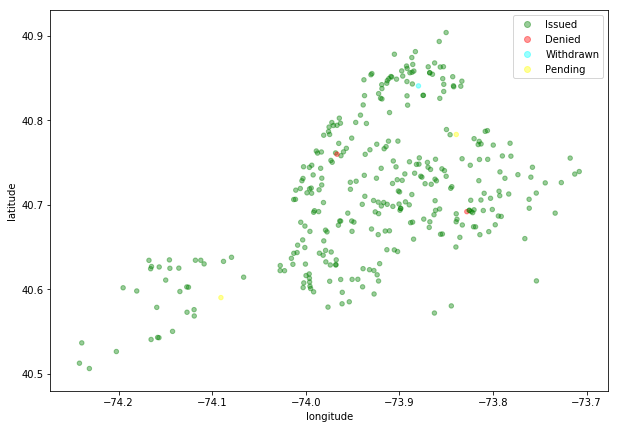

In [14]:
# Plot points by application status
colors = list(renewal_plot_data['status'].unique())
colors = {'Issued' : 'green', 'Denied' : 'red', 'Withdrawn' : 'cyan', 'Pending': 'yellow'}

renewal_plot_data.plot(kind="scatter", x="longitude", y="latitude",
    c=renewal_plot_data['status'].apply(lambda x: colors[x]),
    figsize=(10,7),
    alpha=0.4
)
markers = [plt.Line2D([0,0],[0,0],color=color, alpha=0.4, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1)
plt.show()